# Example of use of the module `doe`

We can import the routine using `import doe`. Note that the file `doe.py` must be in the same directory than your code. Note that we also need the module `numpy`.

In [82]:
import doe
import numpy as np

## Interaction model

We can create our first model matrix by hand, or using `doe.model_matrix(name, factors)`.

In [83]:
modelspec = doe.model_matrix(name="interaction", factors=3)
print("Model matrix =\n", modelspec)

Model matrix =
 [[0 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 1 0]
 [1 0 1]
 [0 1 1]]


Let's now use this model to fit the following data, stored in two `numpy` arrays called `X` and `y`. In this example, suppose that the true model is $y=1+x_1-x_2x_3$. To make things more interesting, we will add some noise to the responses.

In [84]:
X = np.array([
    [3, 1, 0],
    [2, 1, 1],
    [3, 3, 1],
    [1, 2, 0],
    [0, 1, 3],
    [5, 7, 1],
    [4, 3, 3],
    [6, 2, 3],
])

y = 1 + X[:, 0] - X[:, 1] * X[:, 2] + np.random.normal(0, 0.05, size=X.shape[0])

print("X =\n", X)

print("y =\n", y)

X =
 [[3 1 0]
 [2 1 1]
 [3 3 1]
 [1 2 0]
 [0 1 3]
 [5 7 1]
 [4 3 3]
 [6 2 3]]
y =
 [ 4.03441392  2.08750524  0.99312264  2.08772816 -2.04339008 -1.02133698
 -4.03715596  1.16293831]


We can now use `fitlm(X, y, model)` to fit the model to the data. The function returns an object of class `LinearModel`. We can check its properties such as the coefficients by using `model.coefficients`.

In [85]:
model = doe.fitlm(X=X, y=y, modelspec=modelspec)
coefficients_name = ["a_0", "a_1", "a_2", "a_3", "a_12", "a_13", "a_23"]
print("Coefficients :")
for coefficient, name in zip(model.coefficients, coefficients_name):
    print(f"{name} = {coefficient:.3f}")

Coefficients :
a_0 = 1.206
a_1 = 0.947
a_2 = -0.043
a_3 = -0.035
a_12 = 0.013
a_13 = 0.028
a_23 = -1.032


We can now check how good our model is. One method we can use is compare the true responses `y` with predictions made using `LinearModel.predict(X)` and plot the results using the library `matplotlib.pyplot`. The closer the points are to the line $y=x$, the better the model. Another way would be to compute the root mean square error (RMSE) of the model.

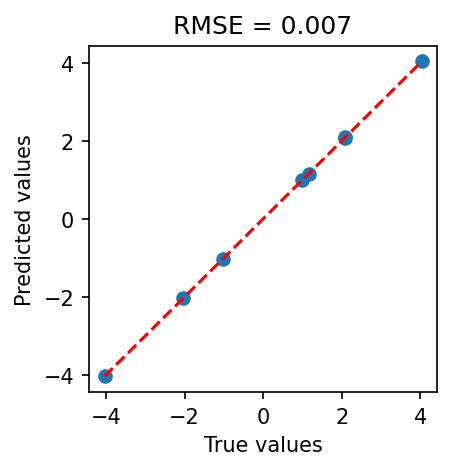

In [86]:
import matplotlib.pyplot as plt

y_pred = model.predict(X=X)
rmse = model.rmse()

plt.figure(figsize=(3, 3), dpi=150)
plt.title(f"RMSE = {rmse:.3f}")
plt.scatter(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

We can even look at the relative effects of each factor using `LinearModel.relative_effect()`.

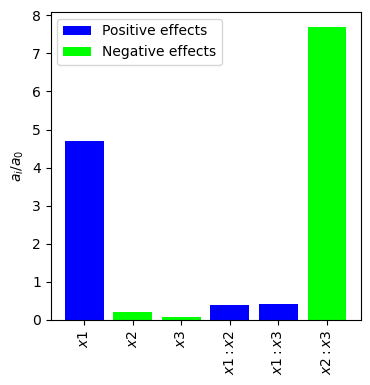

In [87]:
x_to_plot = np.arange(start=1, stop=len(model.coefficients))
y_to_plot = model.relative_effect()

plt.figure(figsize=(4, 4), dpi=100)
plt.bar(x_to_plot[y_to_plot>0], y_to_plot[y_to_plot>0], color="blue", label="Positive effects")
plt.bar(x_to_plot[y_to_plot<0], -y_to_plot[y_to_plot<0], color="lime", label="Negative effects")
plt.xticks(ticks=x_to_plot, labels=[f"${name}$" for name in model.coef_names()[1:]], rotation=90)
plt.legend()
plt.ylabel("$a_i / a_0$")
plt.show()

Looking at figure above, the model seems indeed to be of the form $y=a_0+a_1x_1+a_{23}x_2x_3$.

## Interaction model for quadratic data

Let's now consider new data that won't suit the model. For example, suppose that the true model has linear terms $y=1+x_1-x_2x_3+x_1^2$.

In [91]:
X = np.array([
    [3, 1, 0],
    [2, 1, 1],
    [3, 3, 1],
    [1, 2, 0],
    [0, 1, 3],
    [5, 7, 1],
    [4, 3, 3],
    [6, 2, 3],
])

y = 1 + X[:, 0] - X[:, 1] * X[:, 2] + X[:, 0]**2 + np.random.normal(0, 0.05, size=X.shape[0])

print("X =\n", X)

print("y =\n", y)

X =
 [[3 1 0]
 [2 1 1]
 [3 3 1]
 [1 2 0]
 [0 1 3]
 [5 7 1]
 [4 3 3]
 [6 2 3]]
y =
 [12.92235684  6.01235202  9.94798149  3.02168306 -2.00598676 24.02248186
 12.07811429 36.96778274]


As before, let's try fit the model and print the coefficients.

In [89]:
model = doe.fitlm(X=X, y=y, modelspec="interaction")
coefficients_name = ["a_0", "a_1", "a_2", "a_3", "a_12", "a_13", "a_23"]
print("Coefficients :")
for coefficient, name in zip(model.coefficients, coefficients_name):
    print(f"{name} = {coefficient:.3f}")

Coefficients :
a_0 = -1.919
a_1 = 4.070
a_2 = -0.826
a_3 = 3.410
a_12 = 0.764
a_13 = 0.921
a_23 = -3.366


Plotting the predictions against the true responses, we can see that the model is not so good. The RMSE is also much higher than before.

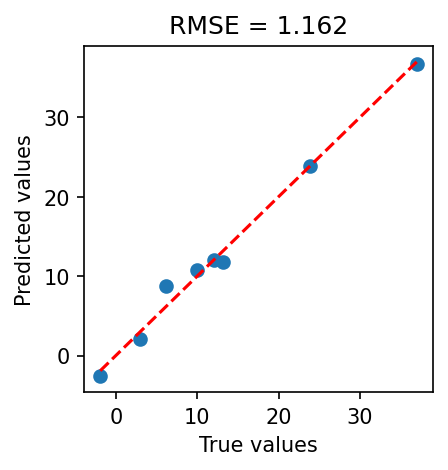

In [90]:
import matplotlib.pyplot as plt

y_pred = model.predict(X=X)
rmse = model.rmse()

plt.figure(figsize=(3, 3), dpi=150)
plt.title(f"RMSE = {rmse:.3f}")
plt.scatter(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()